<a href="https://colab.research.google.com/github/66Fenix66/moon/blob/main/income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
from google.colab import files
files.upload()

{}

In [141]:
import pandas as pd

bc = pd.read_csv(r'BankChurners.csv')

In [142]:
bc.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [143]:
bc.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [144]:
bc.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [145]:
bc['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [146]:
bc = bc[bc.Income_Category != 'Unknown']

In [147]:
copy = bc

In [148]:
bc = pd.get_dummies(bc, prefix=['Education_Level', 'Marital_Status', 'Gender', 'Card_Category', 'Attrition_Flag'], columns=['Education_Level', 'Marital_Status', 'Gender', 'Card_Category', 'Attrition_Flag'])

In [149]:
bc.head()

,CLIENTNUM,Customer_Age,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Gender_F,Gender_M,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag_Attrited Customer,Attrition_Flag_Existing Customer
0,768805383,45,3,$60K - $80K,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
1,818770008,49,5,Less than $40K,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1
2,713982108,51,3,$80K - $120K,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1
3,769911858,40,4,Less than $40K,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1
4,709106358,40,3,$60K - $80K,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1


In [150]:
bc = bc.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', \
                          'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', \
                          'Education_Level_Unknown', 'Marital_Status_Unknown', 'Credit_Limit'], axis=1)

In [151]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9015 entries, 0 to 10126
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_Age                      9015 non-null   int64  
 1   Dependent_count                   9015 non-null   int64  
 2   Income_Category                   9015 non-null   object 
 3   Months_on_book                    9015 non-null   int64  
 4   Total_Relationship_Count          9015 non-null   int64  
 5   Months_Inactive_12_mon            9015 non-null   int64  
 6   Contacts_Count_12_mon             9015 non-null   int64  
 7   Total_Revolving_Bal               9015 non-null   int64  
 8   Avg_Open_To_Buy                   9015 non-null   float64
 9   Total_Amt_Chng_Q4_Q1              9015 non-null   float64
 10  Total_Trans_Amt                   9015 non-null   int64  
 11  Total_Trans_Ct                    9015 non-null   int64  
 12  Total

In [152]:
X = bc.drop(['Income_Category'], axis=1)
y = bc.Income_Category

In [153]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier()

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [155]:
grid_clf = GridSearchCV(clf,
                        {'n_estimators': range(400, 410),
                        'max_depth': range(8, 12),
                        },
                        cv=3)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [156]:
grid_clf.best_params_

{'max_depth': 11, 'n_estimators': 409}

In [157]:
best_clf = grid_clf.best_estimator_

In [158]:
best_clf.score(X_test, y_test)

0.5929759704251386

In [159]:
y_pred = best_clf.predict(X_test)

In [160]:

from sklearn import metrics

In [161]:
print(metrics.classification_report(y_test, y_pred))

                precision    recall  f1-score   support

       $120K +       0.54      0.10      0.17       211
   $40K - $60K       0.50      0.10      0.17       536
   $60K - $80K       0.39      0.54      0.45       416
  $80K - $120K       0.43      0.64      0.51       443
Less than $40K       0.77      0.93      0.84      1099

      accuracy                           0.59      2705
     macro avg       0.53      0.46      0.43      2705
  weighted avg       0.59      0.59      0.54      2705



In [162]:
features = best_clf.feature_importances_

In [163]:
feature_importances = pd.DataFrame({'features': list(X),
                                   'feature_importances':features })
feature_importances.sort_values('feature_importances', ascending=False)

,features,feature_importances
23,Gender_M,0.213920
22,Gender_F,0.205929
7,Avg_Open_To_Buy,0.135384
12,Avg_Utilization_Ratio,0.059579
0,Customer_Age,0.042946
9,Total_Trans_Amt,0.040770
8,Total_Amt_Chng_Q4_Q1,0.038029
11,Total_Ct_Chng_Q4_Q1,0.036847
6,Total_Revolving_Bal,0.034615
10,Total_Trans_Ct,0.034267


In [164]:
copy['Income_Category'] = copy['Income_Category'].replace(['Less than $40K','$120K +'],['$39.9K and less', 'More than $120K'])

In [165]:
inc_by_gender = copy[['Gender', 'Income_Category']]

In [166]:
inc_by_gender = pd.DataFrame(copy.groupby('Gender')['Income_Category'].value_counts())

In [167]:
inc_by_gender.columns = ['Number_of_People']

In [168]:
inc_by_gender = inc_by_gender.reset_index()

In [169]:
inc_by_gender = inc_by_gender.sort_values(['Income_Category'])

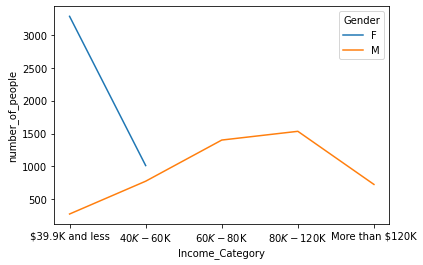

In [170]:
import seaborn as sns
sns.lineplot(data=b, x = 'Income_Category', y = 'number_of_people', hue= 'Gender', sort=True)

In [171]:
avg_otb = copy[['Avg_Open_To_Buy', 'Income_Category']]

In [172]:
avg_otb = avg_otb.sort_values(['Income_Category'])

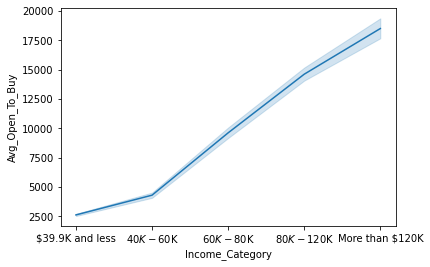

In [173]:
sns.lineplot(data=avg_otb, x = 'Income_Category', y= 'Avg_Open_To_Buy')

In [173]:
В ходе анализа по всем показателям выяснилось, что больше всего(в 3 раза сильнее, чем следующий параметр) на заработок влияет пол клиента. Менеджеры предлагают поставить в банке бесплатное пиво, а женщин внутрь пускать лишь разгульных, для привлечения мужчин.